# STATS 131 Project
Predicting House Sales in King County, USA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler

C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("kc_house_data.csv")

# Background Information

### Motivation



In five to ten years most of us current college students are going to start looking to buy our first home. When we go to buy the house, we need to know if we're getting a fair price and therefore we need to know what factors go into buying the house. What if there was a perfect model to predict what the price of the house should be?

We looked online for a housing price dataset, and we found an interesting one that contained the prices of houses in Kings County, Washington which includes Seattle and the cities surrounding Seattle such as Federal Way,Burien,Bellevue, and many more. 

This dataset is interesting to us because one day I would love to move to the Seattle area, where there are plenty of oppurtunities for data scientists at companies such as Microsoft, Amazon, and many other tech companies that have large offices there. Through this dataset we can not only see the price of a home in the Kings County area, but also how the different cities compare in price. Just as living in Westwood is more expensive than living in San Fernando on average, we wanted to see what cities are more expensive in Seattle, and how much they factor into the price.

### Data Collection

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The data was inputted into the file whenever someone bought a house in the area within the time period. 

Each row in the dataset is a different house that was bought during the time period (observational period).

### Variable Explanations

Square footage definition:The measurement of area, and area is the measurement of any two-dimensional space contained within a set of lines. Simply put, it is a measure of how much space you have.

city- Used the zipcode and latitude/ longitude to tell us what city the house was located in

vintage-

Date- The date the house was bought, formated yearmonthday

Bedrooms- How many bedrooms are in the house

Bathrooms- How many bathrooms are in the house, .5 implies no shower

sqft_living- Square footage of the apartments interior living space

sqft_lot - Square footage of the land space that the house has outside it and that the person owns.

floors - Number of floors (two stories, three stories, etc)

waterfront - A dummy variable for whether the house had a view of a lake,ocean, or any body of water.

view - An index from 0 to 4 of how good the view of the property was, how nice the surrounding area is

condition- How good the overall condition of the house was at the time, such as was it freshly painting, were the floors old, 
any holes in the wall.

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

sqft_above - The square footage of the interior housing space that is above ground level 

sqft_basement - The square footage of the interior housing space that is below ground level 

yr_built - The year the house was first built

yr_renovated - The year the house was last renovated

zipcode - what area zipcode the house is in

lat - Lattitude 

long - Longitude 

sqft_living15 - The square footage of interior housing living space for the nearest 15 houses

sqft_lot15 - The square footage of the land lots of the nearest 15 houses

Finally, our response variable is price. This is the price is dollars that the house was bought for.



### Common knowledge

The cities considered nice and more classy based on nearby school quality, safety,cleanliness, and many other factors in Kings County include Seattle, Bellevue, Woodinville,Sammamish, and Kenmore.
The cities that are considered not as nice and on the low tier are Auburn,Seatac,Tukila,and Tacoma.

The median house price in King County is $407,400.

### Prior Research

Opendoor, a housing pricing website did a study and found the most influential factors that affect housing prices are:
1) The past prices of homes recently sold in the area.
2)Location, with important subfactors including quality of schools,employment oppurtunities, markets and clothing stores
3)Home Size
4)Age and Conditions

source: https://www.opendoor.com/w/blog/factors-that-influence-home-value

Zillow, a popular online real estate database company, uses factors such as baths, square footage, zipcode, and year built when people are searching for homes.

We are now going to do our explatory analysis to see if we can see any good potential predictors for price.


# Exploratory Analysis of the Data

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['date'] = pd.to_datetime({'year':df.date.str[:4], 'month':df.date.str[4:6], 'day':df.date.str[6:8]})
# cleaning up 'date' column

In [5]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [6]:
df.shape # 19 house features plus the price and the id columns, along with 21613 observations.

(21613, 21)

In [7]:
df['price'].describe() # describes price summary statistics, mean price of 540,008.81

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

C:\Users\tyler\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


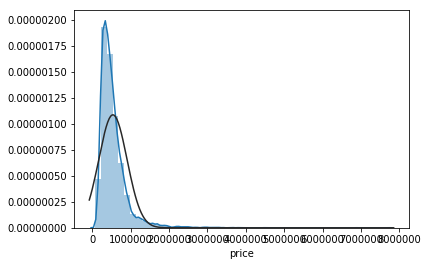

In [8]:
sns.distplot(df['price'] , fit=norm) 

Distibution of house price is right skewed because mean price (540k) is greater than the median (450k).

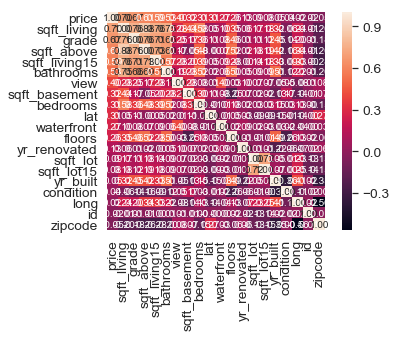

In [9]:
# Top 10 Heatmap
n = 20 # number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(n, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Based on correlation matrix, following variables (bathrooms, sqft_living, grade, sqft_above, sqft_living15) are highly correlated to price.

In [10]:
corrmat.loc[((corrmat.price > 0.4) | (corrmat.price < -0.4)), 'price':'price'].sort_values('price',ascending = False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138


### Data Transformations with highly correlated variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

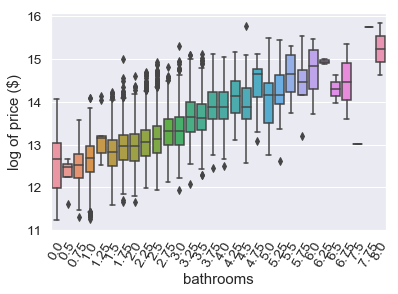

In [11]:
# sns.boxplot(x="bathrooms", y="price", data=df)  # more bathrooms, higher the price

sns.boxplot(x="bathrooms", y=np.log(df.price), data=df).set(ylabel='log of price ($)')
plt.xticks(rotation=60)

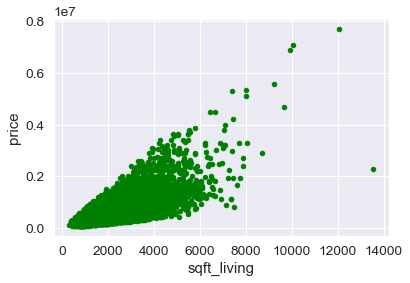

In [12]:
df.plot.scatter(x='sqft_living',y='price',c='green') # higher the squarefoootage of living area, higher the price
plt.show()

C:\Users\tyler\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


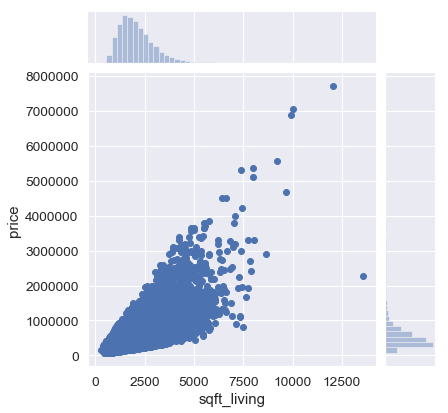

In [13]:
sns.jointplot(x='sqft_living',y='price',  data = df)
plt.show()

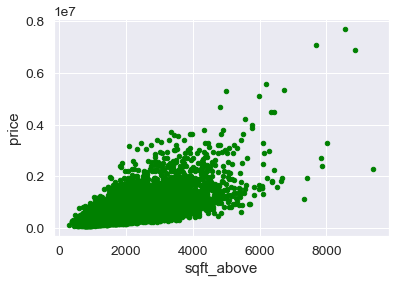

In [14]:
df.plot.scatter(x='sqft_above', y='price',c='green') # square footage of house apart from basement is an important predictor as well
plt.show()

C:\Users\tyler\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


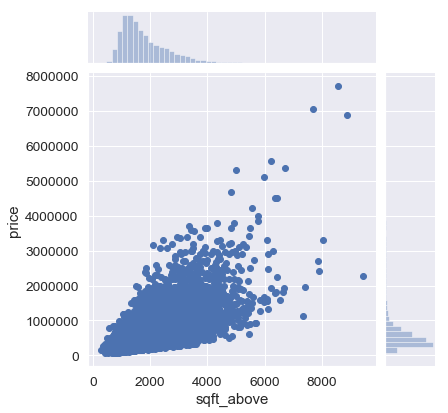

In [15]:
sns.jointplot(x='sqft_above',y='price', data = df)
plt.show()

'sqft_living' is actually sum of 'sqft_above' and 'sqft_basement.' Having all these three variables is redundant and causing multicollinearity. We are more interested in how square footage of basement over entire square footage affects price. Therefore 'sqft_basement_ratio' = 'sqft_basement'/'sqft_living' is needed.

In [16]:
df['sqft_basement'] = df['sqft_basement'] / df['sqft_living']
df = df.rename(columns = {'sqft_basement':'sqft_basement_ratio'})
df = df.drop(columns = "sqft_above")

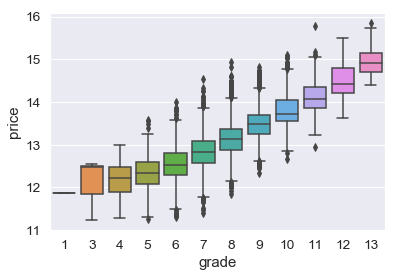

In [17]:
# sns.boxplot(x="grade", y="price", data=df) # better the grade, the better the price, really high correlation.

sns.boxplot(x="grade", y=np.log(df.price), data=df)
plt.show()

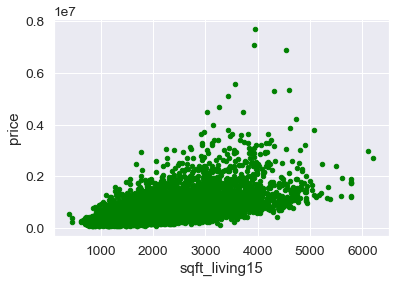

In [18]:
df.plot.scatter(x='sqft_living15',y='price',c='green')# see moderate correlation between price and sqft living area in 2015.
plt.show()

C:\Users\tyler\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


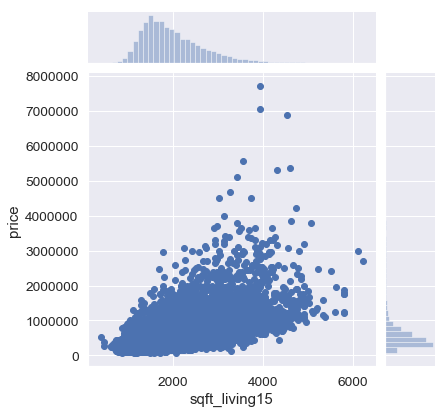

In [19]:
sns.jointplot(x='sqft_living15',y='price', data = df)
plt.show()

'sqft_living15' and 'sqrt_lot15' are the areas in 2015 (implies some renovations). These variables are not needed since we already have 'sqft_living' and 'sqrt_lot.' In order to natigate the amount of increase or decrease in square footage affecting on price, 'sqft_living15' is substracted by 'sqft_living,' same procedure for 'sqrt_lot15.'

In [20]:
df['sqft_living15'] = df['sqft_living15'] - df['sqft_living']
df['sqft_lot15'] = df['sqft_lot15'] - df['sqft_lot']

Now we see that 'sqft_living15' becomes an important variable to predict 'price'

In [21]:
corrmat.loc[((corrmat.price > 0.4) | (corrmat.price < -0.4)), 'price':'price'].sort_values('price',ascending = False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138


### Data Transformations with weakly correlated variables

In [22]:
corrmat.loc[:,'price':'price'].sort_values('price').iloc[1:15,:].sort_values('price', ascending = False)

,price
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003
waterfront,0.266369
floors,0.256794
yr_renovated,0.126434
sqft_lot,0.089661
sqft_lot15,0.082447


'yr_built' and 'yr_renovated' ranked very low correlation because the size of numerics itself is nothing to do with price. 'How old is an apartment when it's sold?' is more important information to predict the price. Renovation has to be in consideration as well. It can be calculated using 'Date','yr_built', and 'yr_renovated.'

In [23]:
df['vintage'] = df.date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1) 
# gets the latest year from 'yr_built' and 'yr_renovated'.

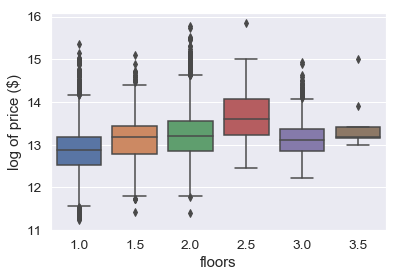

In [24]:
# sns.boxplot(x="floors", y="price", data=df)#not much correlation between floors and price

sns.boxplot(x="floors", y=np.log(df.price), data=df).set(ylabel='log of price ($)')
plt.show()

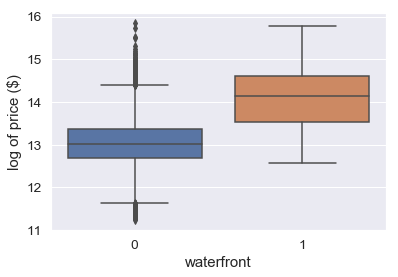

In [25]:
# sns.boxplot(x="waterfront", y="price", data=df)# seems to be a higher price for water front property, but has only 0.266 correlation coefficient.

sns.boxplot(x="waterfront", y=np.log(df.price), data=df).set(ylabel='log of price ($)')
plt.show()

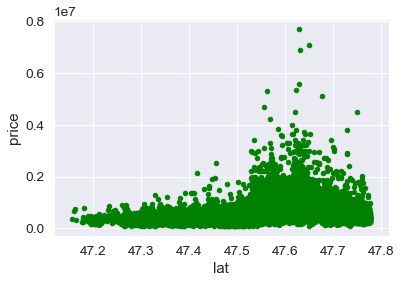

In [26]:
df.plot.scatter(x='lat',y='price',c='green') #latitude also does not seem to have strong correlation.
plt.show()

In [27]:
df['zipcode'].nunique()

70

In [28]:
sorted(df.zipcode.unique())

[98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98024,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98038,
 98039,
 98040,
 98042,
 98045,
 98052,
 98053,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98072,
 98074,
 98075,
 98077,
 98092,
 98102,
 98103,
 98105,
 98106,
 98107,
 98108,
 98109,
 98112,
 98115,
 98116,
 98117,
 98118,
 98119,
 98122,
 98125,
 98126,
 98133,
 98136,
 98144,
 98146,
 98148,
 98155,
 98166,
 98168,
 98177,
 98178,
 98188,
 98198,
 98199]

In [29]:
'''
#98178 Tukila
#98125,98136 98125,98136,98115 Seattle
#98028 Kenmore
#98074 98074 Sammamish
#98053 Remond
#98003 Federal Way
#98198 Des Moines
#98178, Tukwila
#98028, Kenmore  
98146 Burien
98038, Mapple Valley
98007,  Bellevue 

       
       '''

'\n#98178 Tukila\n#98125,98136 98125,98136,98115 Seattle\n#98028 Kenmore\n#98074 98074 Sammamish\n#98053 Remond\n#98003 Federal Way\n#98198 Des Moines\n#98178, Tukwila\n#98028, Kenmore  \n98146 Burien\n98038, Mapple Valley\n98007,  Bellevue \n\n       \n       '

In [30]:
'''
[98001=Federal Way
 98002=Auburn
 
 98004.98005,98006,98008=Bellevue
 
 98010=Black Diamond
 98011=Bothell
 98014=Carnation
 98019=Duvall
 98022=Enumclaw
 98023=Federal Way
 98024=Fall City
 98027,98029=Issaquah
 98030,98031, 98032=Kent 
 98033,98034=Kirkland 
 
 98039=Medina 
 98040=Mercer Island 
 98042=Kent
 98045=North Bend 
 98052=Redmond 
 
 98055, 98056, 98058, 98059=Renton
 98065=Snoqualmie
 98070=Vashon
 98072=Woodinville
 
 98075=Sammamish
 98077=Woodinville
 98092=Auburn
 
98199,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118 98119,98122,98126,98133,98144, 98148=Seattle
 
 98166, 98168=Burien

 98188=Seatac
 

'''

'\n[98001=Federal Way\n 98002=Auburn\n \n 98004.98005,98006,98008=Bellevue\n \n 98010=Black Diamond\n 98011=Bothell\n 98014=Carnation\n 98019=Duvall\n 98022=Enumclaw\n 98023=Federal Way\n 98024=Fall City\n 98027,98029=Issaquah\n 98030,98031, 98032=Kent \n 98033,98034=Kirkland \n \n 98039=Medina \n 98040=Mercer Island \n 98042=Kent\n 98045=North Bend \n 98052=Redmond \n \n 98055, 98056, 98058, 98059=Renton\n 98065=Snoqualmie\n 98070=Vashon\n 98072=Woodinville\n \n 98075=Sammamish\n 98077=Woodinville\n 98092=Auburn\n \n98199,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118 98119,98122,98126,98133,98144, 98148=Seattle\n \n 98166, 98168=Burien\n\n 98188=Seatac\n \n\n'

In [31]:
df["city"]=np.nan

In [32]:
df.loc[df.zipcode == 98148, 'city'] = "Seattle"

In [33]:
print(df.city)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
21583    NaN
21584    NaN
21585    NaN
21586    NaN
21587    NaN
21588    NaN
21589    NaN
21590    NaN
21591    NaN
21592    NaN
21593    NaN
21594    NaN
21595    NaN
21596    NaN
21597    NaN
21598    NaN
21599    NaN
21600    NaN
21601    NaN
21602    NaN
21603    NaN
21604    NaN
21605    NaN
21606    NaN
21607    NaN
21608    NaN
21609    NaN
21610    NaN
21611    NaN
21612    NaN
Name: city, Length: 21613, dtype: object


In [36]:
df.loc[df.zipcode == 98178, 'city'] = "Tukwila"
df.loc[df.zipcode == 98125, 'city'] = "Seattle"

In [37]:
print(df.city)

0        Tukwila
1        Seattle
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
21583        NaN
21584        NaN
21585        NaN
21586        NaN
21587    Seattle
21588        NaN
21589        NaN
21590        NaN
21591    Tukwila
21592        NaN
21593        NaN
21594        NaN
21595        NaN
21596        NaN
21597        NaN
21598        NaN
21599        NaN
21600        NaN
21601    Seattle
21602        NaN
21603        NaN
21604        NaN
21605        NaN
21606        NaN
21607        NaN
21608        NaN
21609        NaN
21610        N